<a href="https://colab.research.google.com/github/mornaeldernar/BeduML/blob/main/Equipo11BeduProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neumonia
Liga DS:
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia?resource=download

Liga Drive:
https://drive.google.com/drive/folders/1KlowxoRoWsLyOcsi2i7NHp_D8G8rxLiF?usp=drive_link

Video Expicacion Conv2D: https://www.youtube.com/watch?v=ukZTjkkhjOk

## Pasos para crear el modelo
1. Cargar datos y limpiarlos
2. Encontrar X y Y, Y separar en entrenamiento y prueba
3. Crear el modelo (instanciar el objeto de una clase)
4. Entrenar el modelo (fit)
5. Probar (predict)

## Importar librerias

In [2]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
from tensorflow.keras.utils import plot_model

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Funciones y variables

Definimos la ruta donde estan las imagenes

In [5]:
'/content/drive/MyDrive/Bedu /NEUMONIA'

'/content/drive/MyDrive/Bedu /NEUMONIA'

In [6]:
ruta_base = '/content/drive/MyDrive/Bedu ML Project'
imagenes_ruta = ruta_base+"/Neumonia Dataset"

Definimos nuestras variables para que todas las imagenes sean del mismo tamaño

In [7]:
width = 300
height= 300

Cargamos las rutas de las imagenes y utilizamos One Hot Encoding para etiquetar nuestras imagenes


In [8]:
def onehotencoding(categoria, valor, texto):
  array = []
  for x, y in enumerate(categoria):
    if y == valor:
      array = np.zeros(len(categoria))
      array[x] = 1
  return np.append(texto, array)

Función para cargar las imagenes de un dataset, cambiarles el tamaños y regresa un numpy array

In [9]:
def cargarImagenes(data_frame):
  lista_imagenes = []
  for i in data_frame :
    img = cv2.imread(i)
    resized_img = cv2.resize(img,(width, height))
    lista_imagenes.append(resized_img)
  lista_imagenes = np.array(lista_imagenes)
  return lista_imagenes

Transformamos las imagenes de entrenamiento en un numpy array para que se puedan entrenar mas fácil con las redes neuronales.

In [10]:
def transformar(imagenes, resultados):
  x_numpy = cargarImagenes(imagenes)
  y_numpy = np.array(resultados)
  y_numpy = y_numpy.astype(float)
  return x_numpy,y_numpy

Graficamos la primera imagen del numpy array para ver como quedo

In [11]:
def mostrarImagen(imagen):
  plt.figure(figsize=(7,7))
  plt.imshow(imagen)

Aquí cargamos el directorio donde estan las imagenes

In [13]:
ruta = imagenes_ruta  # Reemplaza esta ruta con la ruta correcta a tu directorio
categorias = os.listdir(ruta)
categorias

['NORMAL', 'NEUMONIA']

## 1. Cargar los datos

In [14]:
columnas = categorias.copy()
columnas.append('ARCHIVO')
columnas = columnas[-1:]+columnas[:-1]
columnas

['ARCHIVO', 'NORMAL', 'NEUMONIA']

In [16]:
X = []
y = []
df = pd.DataFrame(columns = columnas)
df.columns

Index(['ARCHIVO', 'NORMAL', 'NEUMONIA'], dtype='object')

In [17]:
import os

for i in os.listdir(ruta):
    if os.path.isdir(os.path.join(ruta, i)):  # Comprueba si es un directorio
        print(i)
        cuantos = 0
        for j in os.listdir(os.path.join(ruta, i)):
            cuantos = cuantos + 1
            valores = onehotencoding(categorias, i, os.path.join(ruta, i, j))
            df.loc[len(df.index)] = valores
        print(cuantos)
    else:
        print(f"{i} no es un directorio")


NORMAL
1583
NEUMONIA
4313


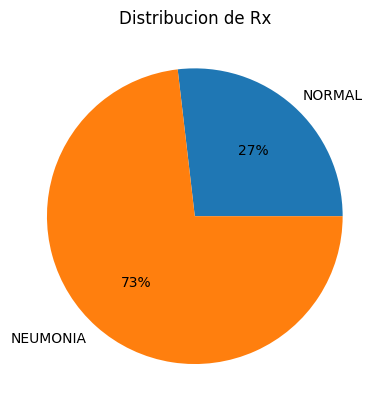

In [21]:
labels = ["NORMAL","NEUMONIA"]
data = [1583, 4313]
plt.pie(data,labels=labels, autopct = '%0.0f%%')
plt.title("Distribucion de Rx")
plt.show()

Desordenamos los datos para que no queden todos los

*   Elemento de lista
*   Elemento de lista

normales arriba y neumonia abajo

In [19]:
df = shuffle(df)

In [20]:
df.head()

,ARCHIVO,NORMAL,NEUMONIA
6929,/content/drive/MyDrive/Bedu ML Project/Neumoni...,1.0,0.0
2143,/content/drive/MyDrive/Bedu ML Project/Neumoni...,0.0,1.0
1778,/content/drive/MyDrive/Bedu ML Project/Neumoni...,0.0,1.0
2427,/content/drive/MyDrive/Bedu ML Project/Neumoni...,0.0,1.0
9687,/content/drive/MyDrive/Bedu ML Project/Neumoni...,0.0,1.0


## 2. Separar los datos

Separamos los datos en 70% entrenamiento y 30% pruebas

In [22]:
[X_train, X_test, y_train, y_test] = train_test_split(df['ARCHIVO'], df[['NORMAL','NEUMONIA']], test_size=0.30)

In [23]:
X_train

7834     /content/drive/MyDrive/Bedu ML Project/Neumoni...
970      /content/drive/MyDrive/Bedu ML Project/Neumoni...
10237    /content/drive/MyDrive/Bedu ML Project/Neumoni...
5869     /content/drive/MyDrive/Bedu ML Project/Neumoni...
4459     /content/drive/MyDrive/Bedu ML Project/Neumoni...
                               ...                        
10505    /content/drive/MyDrive/Bedu ML Project/Neumoni...
138      /content/drive/MyDrive/Bedu ML Project/Neumoni...
8802     /content/drive/MyDrive/Bedu ML Project/Neumoni...
11573    /content/drive/MyDrive/Bedu ML Project/Neumoni...
3509     /content/drive/MyDrive/Bedu ML Project/Neumoni...
Name: ARCHIVO, Length: 8254, dtype: object

In [24]:
x_numpy = cargarImagenes(X_train)

In [25]:
y_train

,NORMAL,NEUMONIA
7834,0.0,1.0
970,1.0,0.0
10237,0.0,1.0
5869,0.0,1.0
4459,0.0,1.0
...,...,...
10505,0.0,1.0
138,1.0,0.0
8802,0.0,1.0
11573,0.0,1.0


In [26]:
y_numpy = np.array(y_train)

In [27]:
type(y_numpy[0][0])

str

In [28]:
y_numpy = y_numpy.astype(float)

In [29]:
type(y_numpy[0][0])

numpy.float64

Guardamos los csv para que no los tengamos que estar separando cada vez y entrenar de nuevo el modelo

In [ ]:
X_train.to_csv(ruta_base+'/X_train.csv')
X_test.to_csv(ruta_base+'/X_test.csv')
y_train.to_csv(ruta_base+'/y_train.csv')
y_test.to_csv(ruta_base+'/y_test.csv')

## 2.5 Mostrar las imagenes

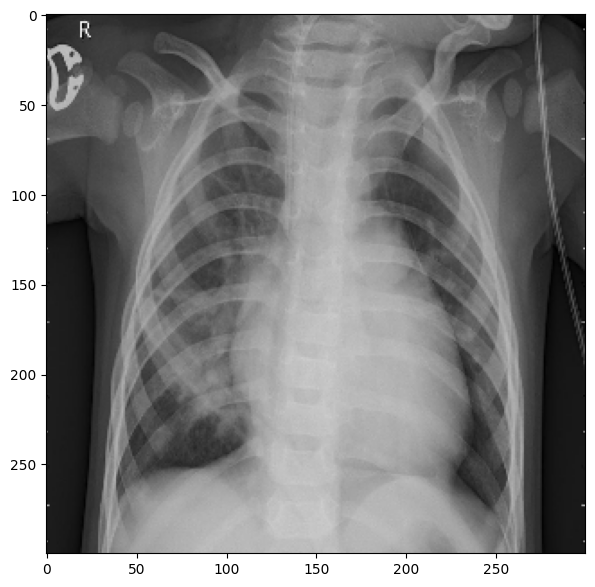

In [30]:
mostrarImagen(x_numpy[2])

## 3. Crear el modelo

Creamos nuestra red neuronal
Modelo de keras Sequencial
Capa:
1. Conv2D con 32 patrones en grupos de 3*3 pixeles
2. Activacion Relu, los estructure y los pase a la siguiente capa
3. MaxPooling2D para reducir un poco mas el tamaño de la imagen y encontrar mas patrones
4. Conv2D con 32 patrones en grupos de 3*3 pixeles
5. Activacion Relu, los estructure y los pase a la siguiente capa
6. MaxPooling2D para reducir un poco mas el tamaño de la imagen y encontrar mas patrones
7. Conv2D con 64 patrones en grupos de 3*3 pixeles
8. Activacion Relu, los estructure y los pase a la siguiente capa
9. MaxPooling2D para reducir un poco mas el tamaño de la imagen y encontrar mas patrones
10. Flatten para condensar los datos
11. Dense de 64 neuronas
12. Activacion Relu
13. Dropout para que bloque de forma aleatoria la mitad de ellas y evitar sesgos
14. Dense con 2 neuronas porque tenemos 2 datos
15. Activacion Sigmoide, para que nos de probablidades entre 0 y 1 de que este en cada tipo de dato


La imagen de entrada tiene un tamaño de 300 * 300 * 3, esto quiere decir que tiene un tamaño de 300 pixeles * 300 pixeles * 3 canales de color (Rojo, Verde, Azul)

La capa Conv2D crea N filtros para buscar patrones con la entrada y va con una funcion va sumando los valores de ese filtro en la imagen, en este caso pedimos 32 o 64 filtros diferentes, de tamaño 3*3 pixeles, y se va moviendo el filtro a la siguiente posision para ver si en esos pixeles se encuentra el filtro. El tamaño del resultado de la capa Conv2D será diferente al tamaño de la capa de entrada.
en la primera conv2D entran 300 * 300 * 3 y salen 100 * 100 * 32. Esto es porque con la entrada de 3 * 3 los bordes de la imagen no estan cubiertos y reduce las capas 3 veces en cada direccion 300 / 3 por lo que quedan 100 * 100, la tercera capa de 32 son por los 32 filtros que se aplicaron y son las caracteristicas aprendidas por cada uno de los filtros.

La capa de activacion Relu introduce la no linearidad en la red. lo que hace es compara cada pixel con 0 y devuelve el valor más grande. En otras palabras si es positivo sigue siendo positivo, si es menor a 0 regresa 0.
lo que hace que sea una funcion discontinua en 0.

La capa de maxpooling2d regresa en una matriz de n * n el mayor valor, en este caso estamos utilizando 2 * 2 pixeles para regresar el mayor de los 4 numero. esto sirve para reducir la dimensionalidad de la capa anterior a la mitad.
Esto sirve para conservar las caracteristicas mas importantes reduciendo la dimensionalidad.

La capa Flatten aplana los datos, si tenemos una matriz de 2 * 2 la transforma en una matriz de 1 * 4. Esto se necesita antes de la capa Dense porque la capas Dense solo aceptan capas unidimensionales.

La capa Dense es una capa completamente conectada, cada neurona esta conectada a las neuronas anteriores. Tenemos de parametro 64, porque estamos especificando que vamos a utilizar 64 neuronas para esta capa

la capa dropout sirve para prevenir el sobre ajuste. En este caso desactivaremos aleatoriamente el 50% de las neuronas de la capa anterior.

Con la capa Dense(2) estamos definiendo que es un problema de clasificacion binaria porque tenemos 2 clases Normal y Neumonia, y la salida de estas clases se utilizara para obtener la probabilidad de pertenecer a cada una de las clases

La capa de Activacion Sigmoide toma el valor de la capa anterior y lo aplasta entre 0 y 1, esto es util para representar la probabilidad de que pertenezca a una clase.

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32,3,3,input_shape=(width,height,3))) ## encontrar 32 patrones en pixeles de 3*3
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(32,3,3))  ## encontrar otros 32 patrones en pixeles de 3*3
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,3,3)) ## encontrar 64 patrones en pixeles de 3*3
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2))
model.add(layers.Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                   

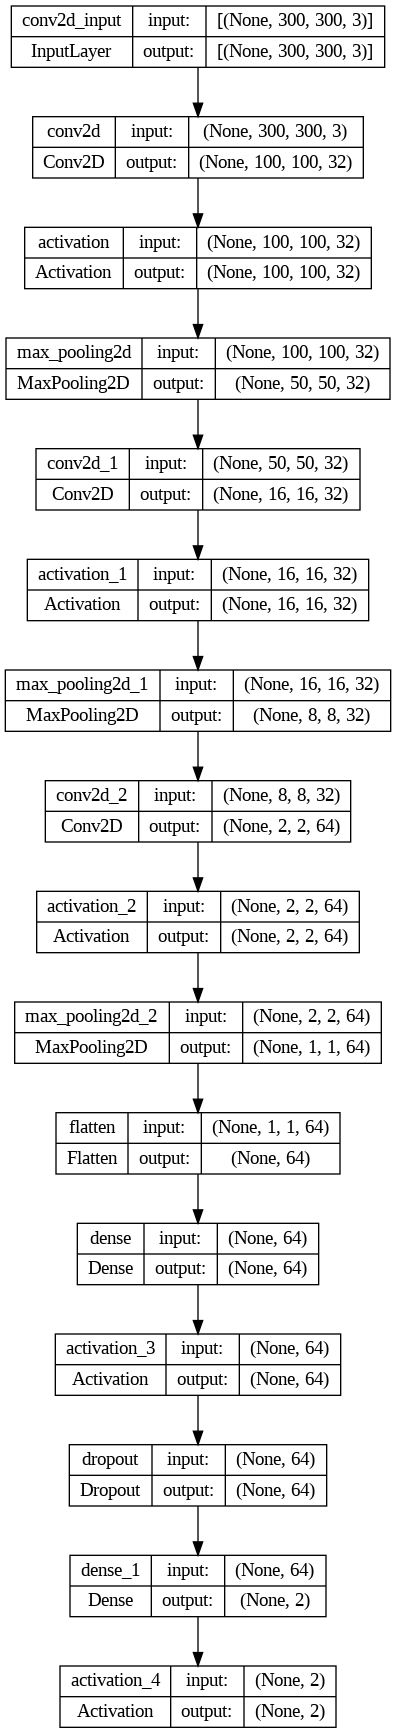

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

Compilamos el modelo

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [ ]:
epochs = 50

BinaryCrossentropy es una funcion de perdida comun para problemas de clasificacion binaria. lo que espera la funcion es que el modelo produzca un valor entre 0 y 1. si es cercano a 1, es que es muy probable que pertenezca a esa clase, y si es cercano a 0 es que es mas probable que pertenezca a la otra clase

Adam es un algoritmo de optimizacion el cual adapta la tasa de aprendizaje automaticamente a lo largo del entrenamiento.

Transformamos los x y y en numpy array porque tensorflow fit recibe arreglos de numpy o tipo tensors. y las X y Y's tienen que tener el mismo tipo de datos

## 4. Entrenar el modelo

In [ ]:
model.fit(x=x_numpy,y=y_numpy,epochs=epochs)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


129/129 [==============================] - 19s 135ms/step - loss: 0.8450 - accuracy: 0.7376
Epoch 2/50
129/129 [==============================] - 18s 140ms/step - loss: 0.4071 - accuracy: 0.8333
Epoch 3/50
129/129 [==============================] - 21s 166ms/step - loss: 0.3412 - accuracy: 0.8580
Epoch 4/50
129/129 [==============================] - 18s 139ms/step - loss: 0.3019 - accuracy: 0.8735
Epoch 5/50
129/129 [==============================] - 17s 134ms/step - loss: 0.2844 - accuracy: 0.8827
Epoch 6/50
129/129 [==============================] - 17s 129ms/step - loss: 0.2900 - accuracy: 0.8805
Epoch 7/50
129/129 [==============================] - 18s 138ms/step - loss: 0.2531 - accuracy: 0.8973
Epoch 8/50
129/129 [==============================] - 18s 137ms/step - loss: 0.2261 - accuracy: 0.9070
Epoch 9/50
129/129 [==============================] - 18s 141ms/step - loss: 0.2189 - accuracy: 0.9113
Epoch 10/50
129/129 [==============================] - 18s 142ms/step - loss: 0.1910

Guardamos nuestro modelo

In [ ]:
models.save_model(model,ruta_base+'/neumonia.keras')

## 5. Probar el modelo

Cargamos el modelo entrenado

In [31]:
model = models.load_model(ruta_base+'/neumonia.keras')

Cargamos los datos de pruebas

In [34]:
X_test = pd.read_csv(ruta_base+'/X_test.csv', index_col=0)
y_test = pd.read_csv(ruta_base+'/y_test.csv',index_col=0)


In [36]:
X_test.head()

,ARCHIVO
3828,/content/drive/MyDrive/Bedu ML Project/Neumoni...
3687,/content/drive/MyDrive/Bedu ML Project/Neumoni...
5333,/content/drive/MyDrive/Bedu ML Project/Neumoni...
3547,/content/drive/MyDrive/Bedu ML Project/Neumoni...
4189,/content/drive/MyDrive/Bedu ML Project/Neumoni...


In [35]:
y_test.head()

,NORMAL,NEUMONIA
3828,0.0,1.0
3687,0.0,1.0
5333,0.0,1.0
3547,0.0,1.0
4189,0.0,1.0


In [42]:
print(X_test.iloc[0]['ARCHIVO'],y_test.iloc[0]['NORMAL'],y_test.iloc[0]['NEUMONIA'])

/content/drive/MyDrive/Bedu ML Project/Neumonia Dataset/NEUMONIA/person154_virus_306.jpeg 0.0 1.0


In [43]:
x, y = transformar(X_test['ARCHIVO'],y_test)

In [44]:
import random

In [45]:
indice_a_predecir = random.randint(0, x.shape[0])
indice_a_predecir

317

In [46]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [47]:
data = x[indice_a_predecir]

In [48]:
result = model.predict(np.array([data]))[0]

1/1 [==============================] - 0s 337ms/step


In [49]:
result

array([9.9999213e-01, 5.9477779e-06], dtype=float32)

In [50]:
categorias[result.argmax()]

'NORMAL'

In [51]:
y_test.iloc[indice_a_predecir]

NORMAL      1.0
NEUMONIA    0.0
Name: 1148, dtype: float64

In [52]:
X_test.iloc[indice_a_predecir]['ARCHIVO']

'/content/drive/MyDrive/Bedu ML Project/Neumonia Dataset/NORMAL/NORMAL2-IM-0297-0001.jpeg'

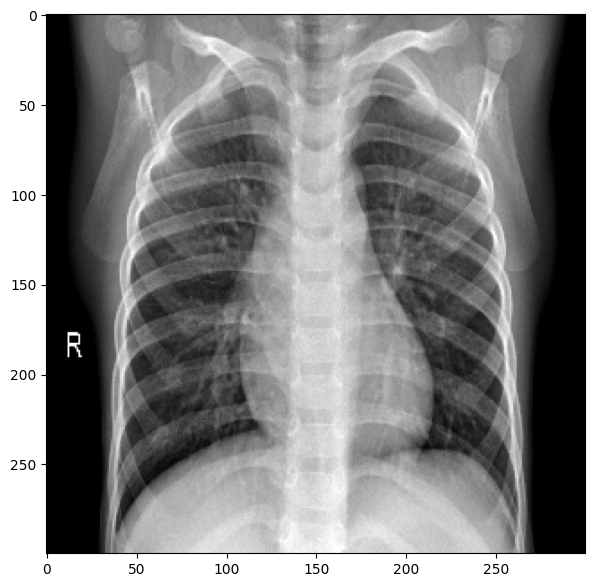

In [53]:
mostrarImagen(x[indice_a_predecir])

Generamos las predicciones de todo el set de pruebas

In [54]:
predicciones = model.predict(x)

56/56 [==============================] - 5s 89ms/step


Para cada imagen de pruebas, seleccionamos el indice de la etiqueta de mayor probabilidad

In [55]:
predicciones_labels = [np.argmax(i) for i in predicciones]

Convertimos el one hot encoding en etiquetas de enteros para nuestras metricas


In [56]:
y_labels = np.argmax(y, axis=1)
y_labels

array([1, 1, 1, ..., 1, 1, 0])

In [57]:
def predecir(x):
  result = model.predict(np.array([x]))[0]
  categoria = categorias[result.argmax()]
  mostrarImagen(x)
  porcentaje = result[result.argmax()]*100
  print(f"La imagen es: {categoria} en un {porcentaje}%, le recomendamos que visite a su médico para corroborar el diagnostico.")

1038
1/1 [==============================] - 0s 16ms/step
La imagen es: NEUMONIA en un 99.96749758720398%, le recomendamos que visite a su médico para corroborar el diagnostico.


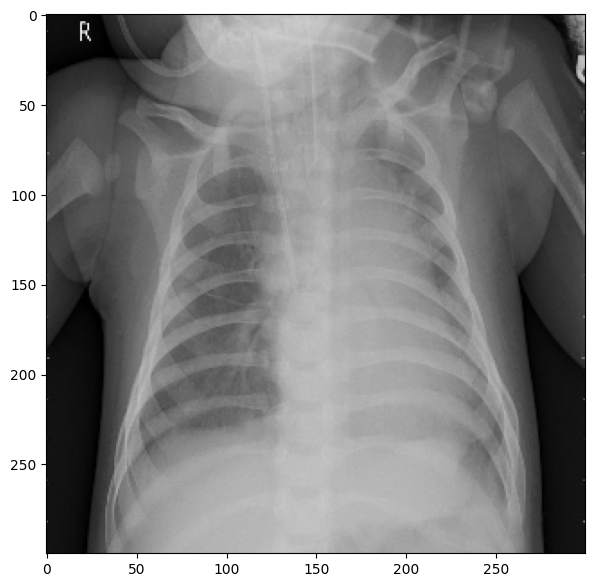

In [58]:
indice_a_predecir = random.randint(0, x.shape[0])
print(indice_a_predecir)
predecir(x[indice_a_predecir])


## Metricas

In [ ]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

In [ ]:
def metricas(y_test, y_pred):
  resultado = confusion_matrix(y_test, y_pred)
  print(resultado)
  (TN, FP, FN, TP) = resultado.ravel()
  print("True positives: "+str(TP))
  print("True negatives: "+str(TN))
  print("False positives: "+str(FP))
  print("False negative: "+str(FN))

  acc = calcularAccuracy(TP, TN, FP, FN)
  sen = calcularSensibilidad(TP, TN, FP, FN)
  spec = calcularEspecificidad(TP, TN, FP, FN)
  print("Precision:"+str(acc)+"%")
  print("Sensibilidad:"+str(sen)+"%")
  print("Especificidad:"+str(spec)+"%")
  # Plot the confusion matrix as a heatmap.
  plt.figure(figsize=[14, 7])
  import seaborn as sn
  sn.heatmap(resultado, annot=True, fmt='d', annot_kws={"size": 12})
  plt.title('Confusion Matrix( 0 - Normal, 1 - Neumonia )')
  plt.xlabel('Predecido')
  plt.ylabel('Real')
  plt.show()

[[ 438   40]
 [ 109 1182]]
True positives: 1182
True negatives: 438
False positives: 40
False negative: 109
Precision:91.57716223855286%
Sensibilidad:91.55693261037955%
Especificidad:91.63179916317992%


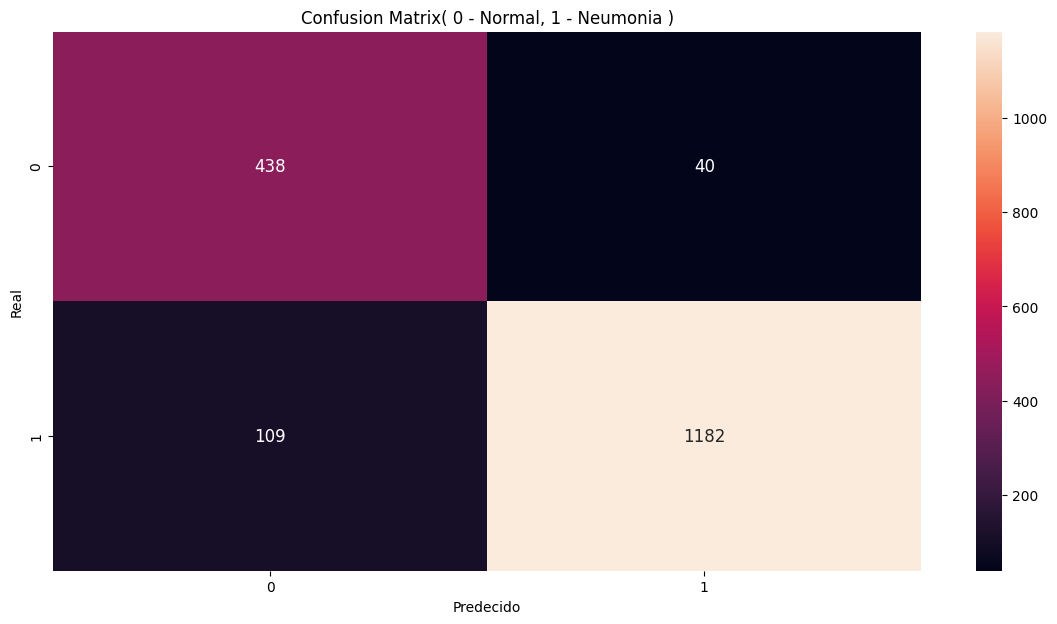

In [ ]:
metricas(y_labels, predicciones_labels)

## Otras funciones

### Cargamos las imagenes en arrays de neumonia y normal

In [66]:
files_neumonia = [f for f in os.listdir(ruta+'/NEUMONIA')]
files_normal = [f for f in os.listdir(ruta+'/NORMAL')]
files_normal[0]

'IM-0545-0001-0001.jpeg'

In [67]:
files_neumonia[0]

'person544_virus_1075.jpeg'

### Manejo de imagenes
#### leemos la imagen

In [68]:
imageOpenCV = cv2.imread(ruta_neumonia+"/"+files_neumonia[0], cv2.IMREAD_COLOR)

In [69]:
image = cv2.cvtColor(imageOpenCV, cv2.COLOR_BGR2RGB)

In [70]:
print(type(image))
print("Tamaño de la imagen: (alto, ancho, canales)")
print(image.shape)

<class 'numpy.ndarray'>
Tamaño de la imagen: (alto, ancho, canales)
(1320, 1752, 3)


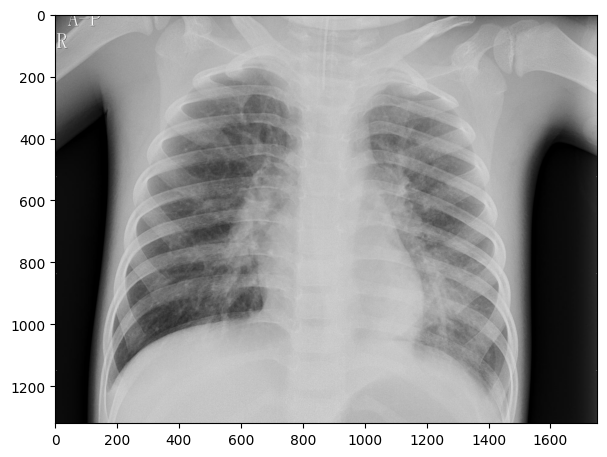

In [71]:

plt.figure(figsize=(7,7))
plt.imshow(imageOpenCV)

### Librerias


Crea histograma de los colores

In [72]:
def crearHistograma(imagen):
    histograma = np.zeros((256))
    imgEnArray = np.ravel(imagen)
    for counter in range(0, len(imgEnArray)):
        histograma[int(imgEnArray[counter])]+=1

    return histograma


### Sirve para separar el fondo de las imagenes

In [73]:

def binarizar(imagenGris, threshold):
  imgBinaria = np.where(imagenGris > threshold,255,0)
  return imgBinaria

### Sirve para que tenga menos colores que procesar

In [74]:
def reducirColores(imagenGris, cantidadDeColores):
    if(cantidadDeColores <= 0):
        return np.zeros_like(imagenGris)

    stepSize = int(255 / (cantidadDeColores))
    for counter in range (0, 255, stepSize):
        if(counter == 0):
            buffer = np.zeros_like(imagenGris)
        else:
            imgFiltrada = np.where(((imagenGris > (counter - stepSize)) & (imagenGris <= counter)), counter, 0)
            buffer = np.add(buffer, imgFiltrada)
    return buffer

### Sirve para cambiar entre la imagen y el fondo

In [75]:
def obtenerNegativo(imagen):
    negativo = np.abs(imagen - 255)
    return negativo

### cual es el color mas utilizado

In [76]:
histograma = crearHistograma(x[:,:,0])
print("Color mas usado:"+str(np.argmax(histograma))+". Usado "+str(np.max(histograma))+" veces.")

Color mas usado:0. Usado 604530.0 veces.


In [77]:
histogramaRojo = crearHistograma(x[:,:,0])
histogramaVerde = crearHistograma(x[:,:,1])
histogramaAzul = crearHistograma(x[:,:,2])

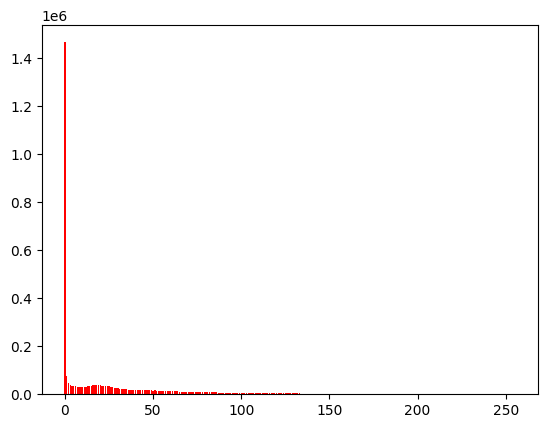

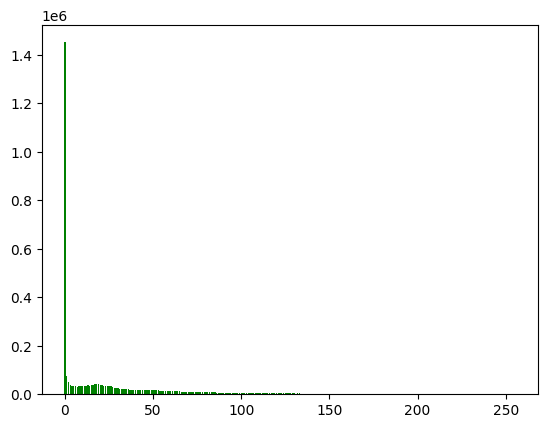

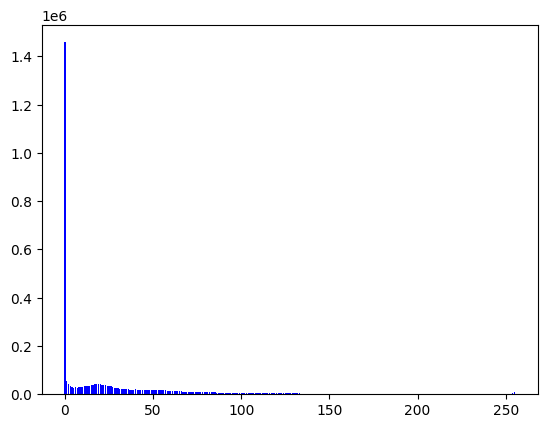

In [ ]:
plt.bar(np.arange(len(histogramaRojo)), histogramaRojo, color='red')
plt.set(title = 'Densidad de color rojo por capa')
plt.show()
plt.bar(np.arange(len(histogramaVerde)),histogramaVerde, color='green')
plt.set(title = 'Densidad de color verde por capa')
plt.show()
plt.bar(np.arange(len(histogramaAzul)), histogramaAzul, color='blue')
plt.set(title = 'Densidad de color azul por capa')
plt.show()

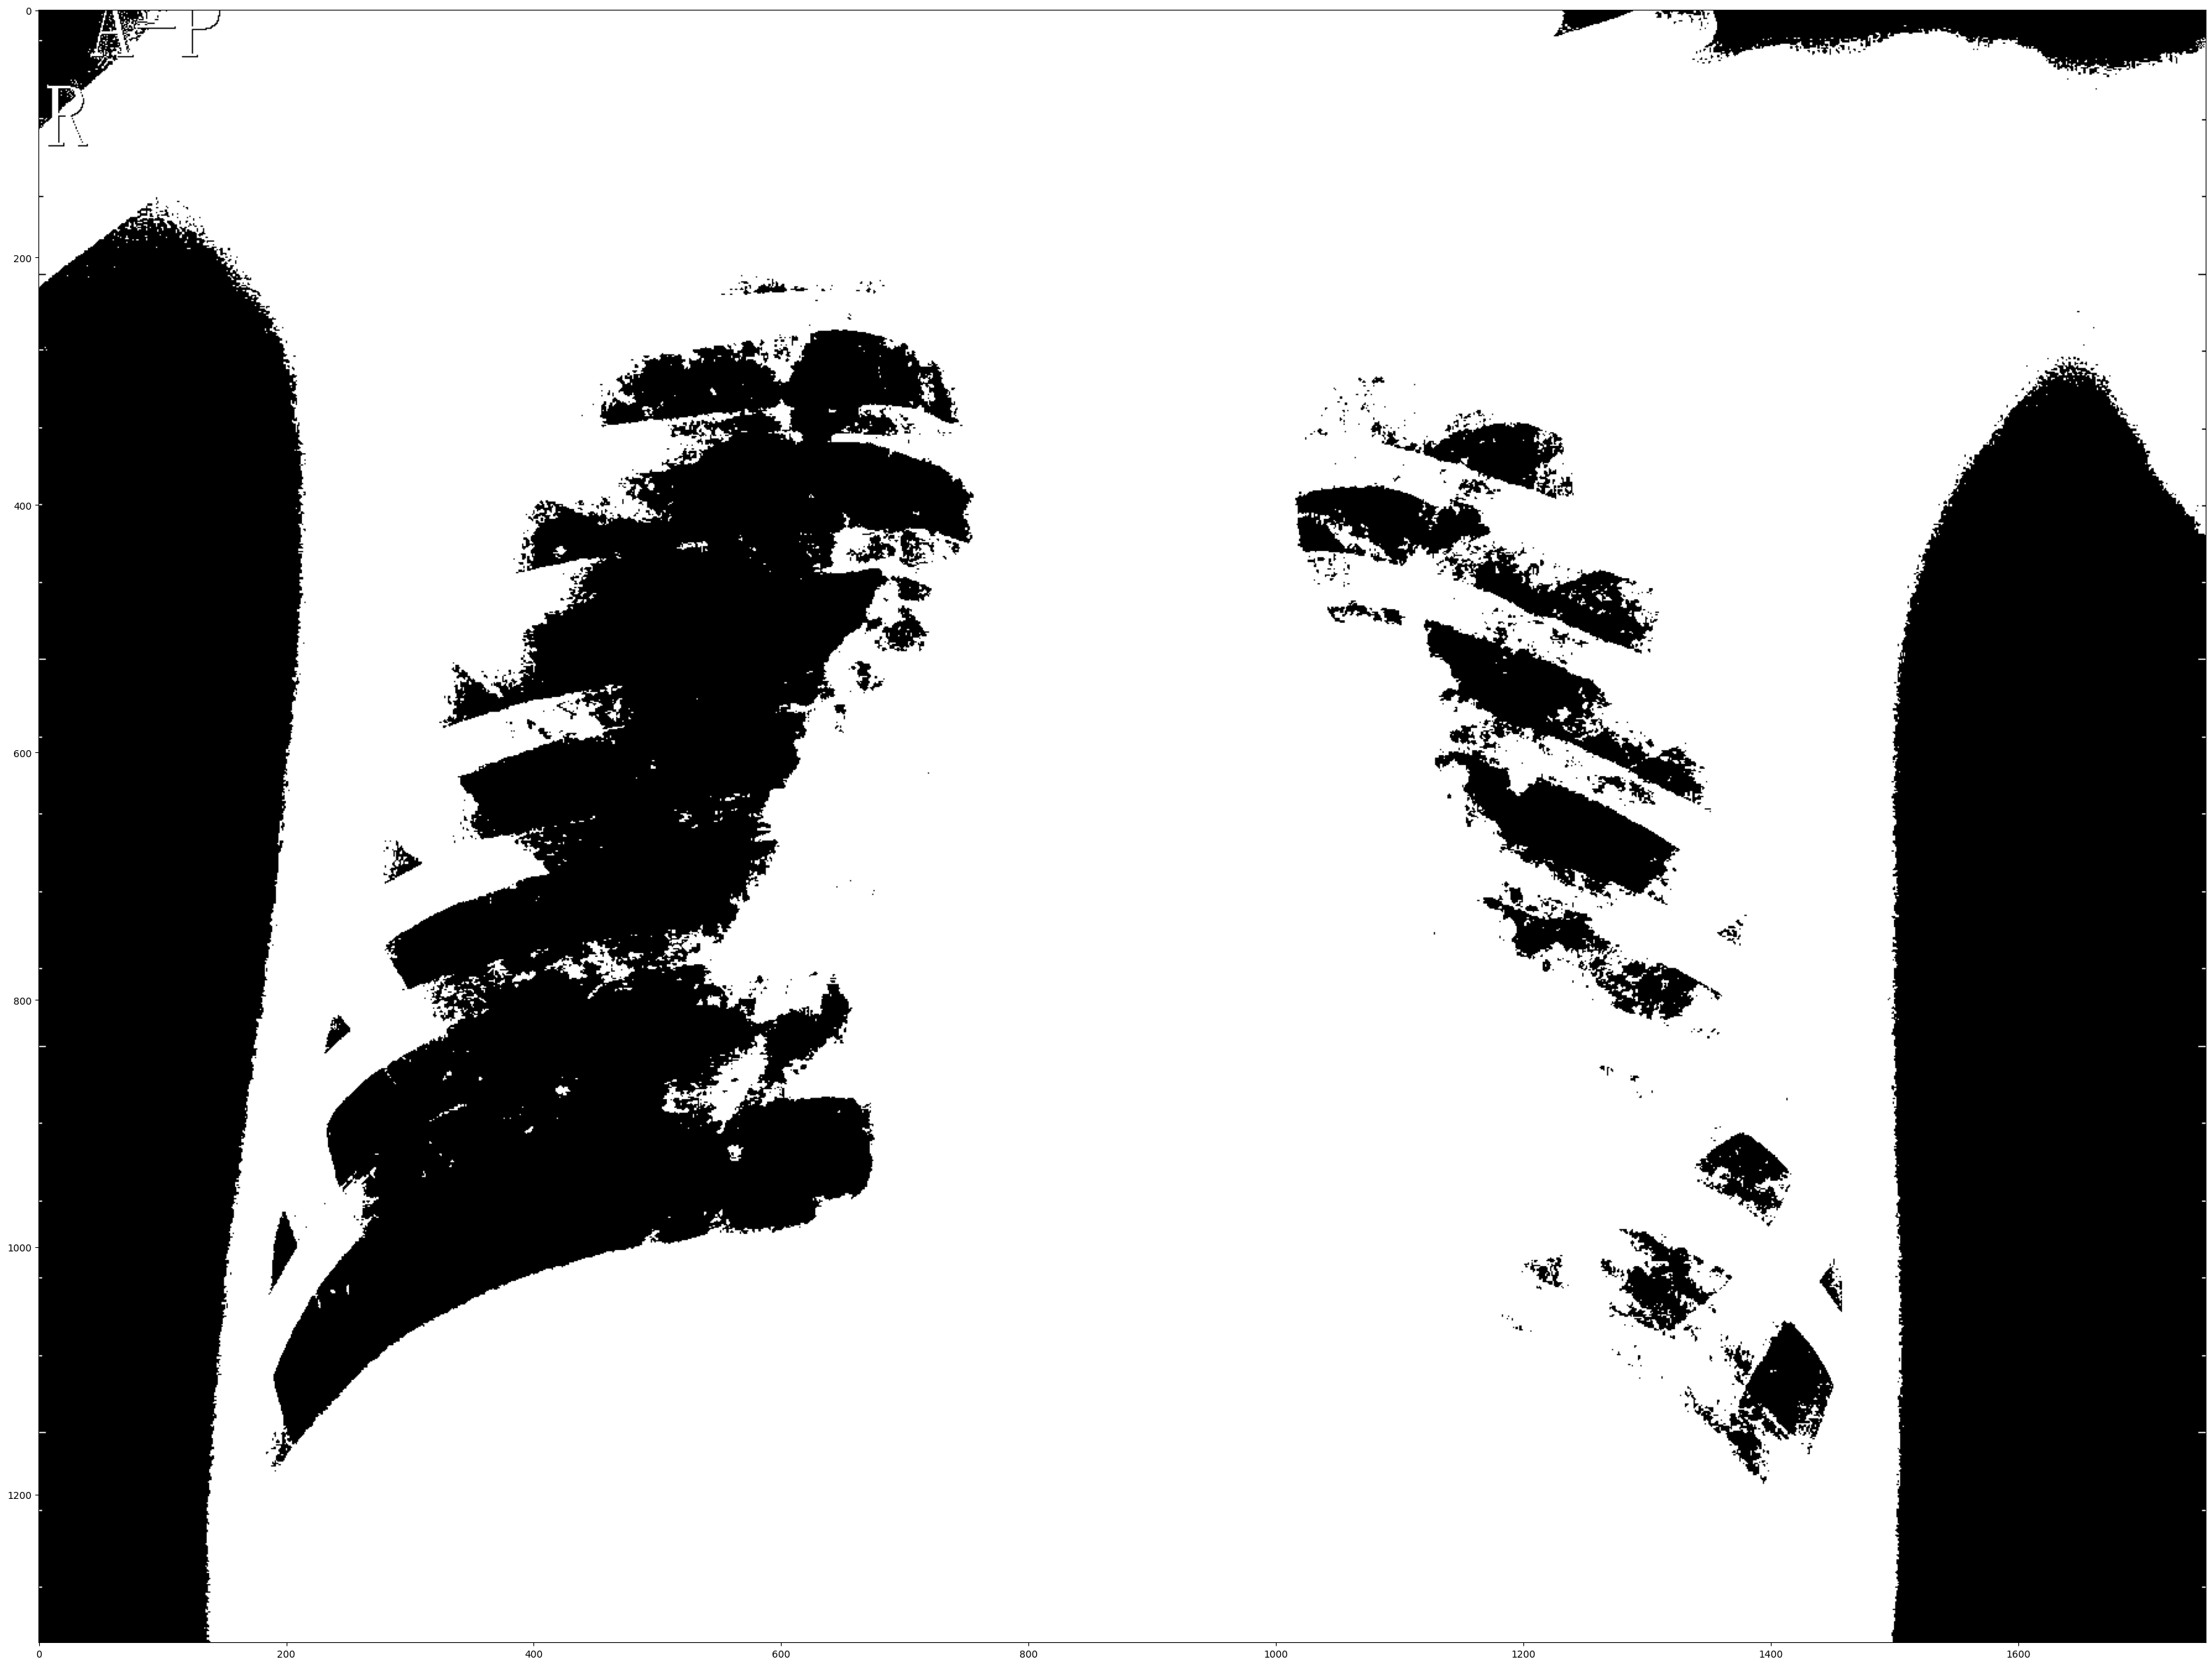

In [78]:
imgBinaria = binarizar(image, 128)
plt.figure(figsize=(40,40))
plt.imshow(imgBinaria, cmap=plt.cm.gray)

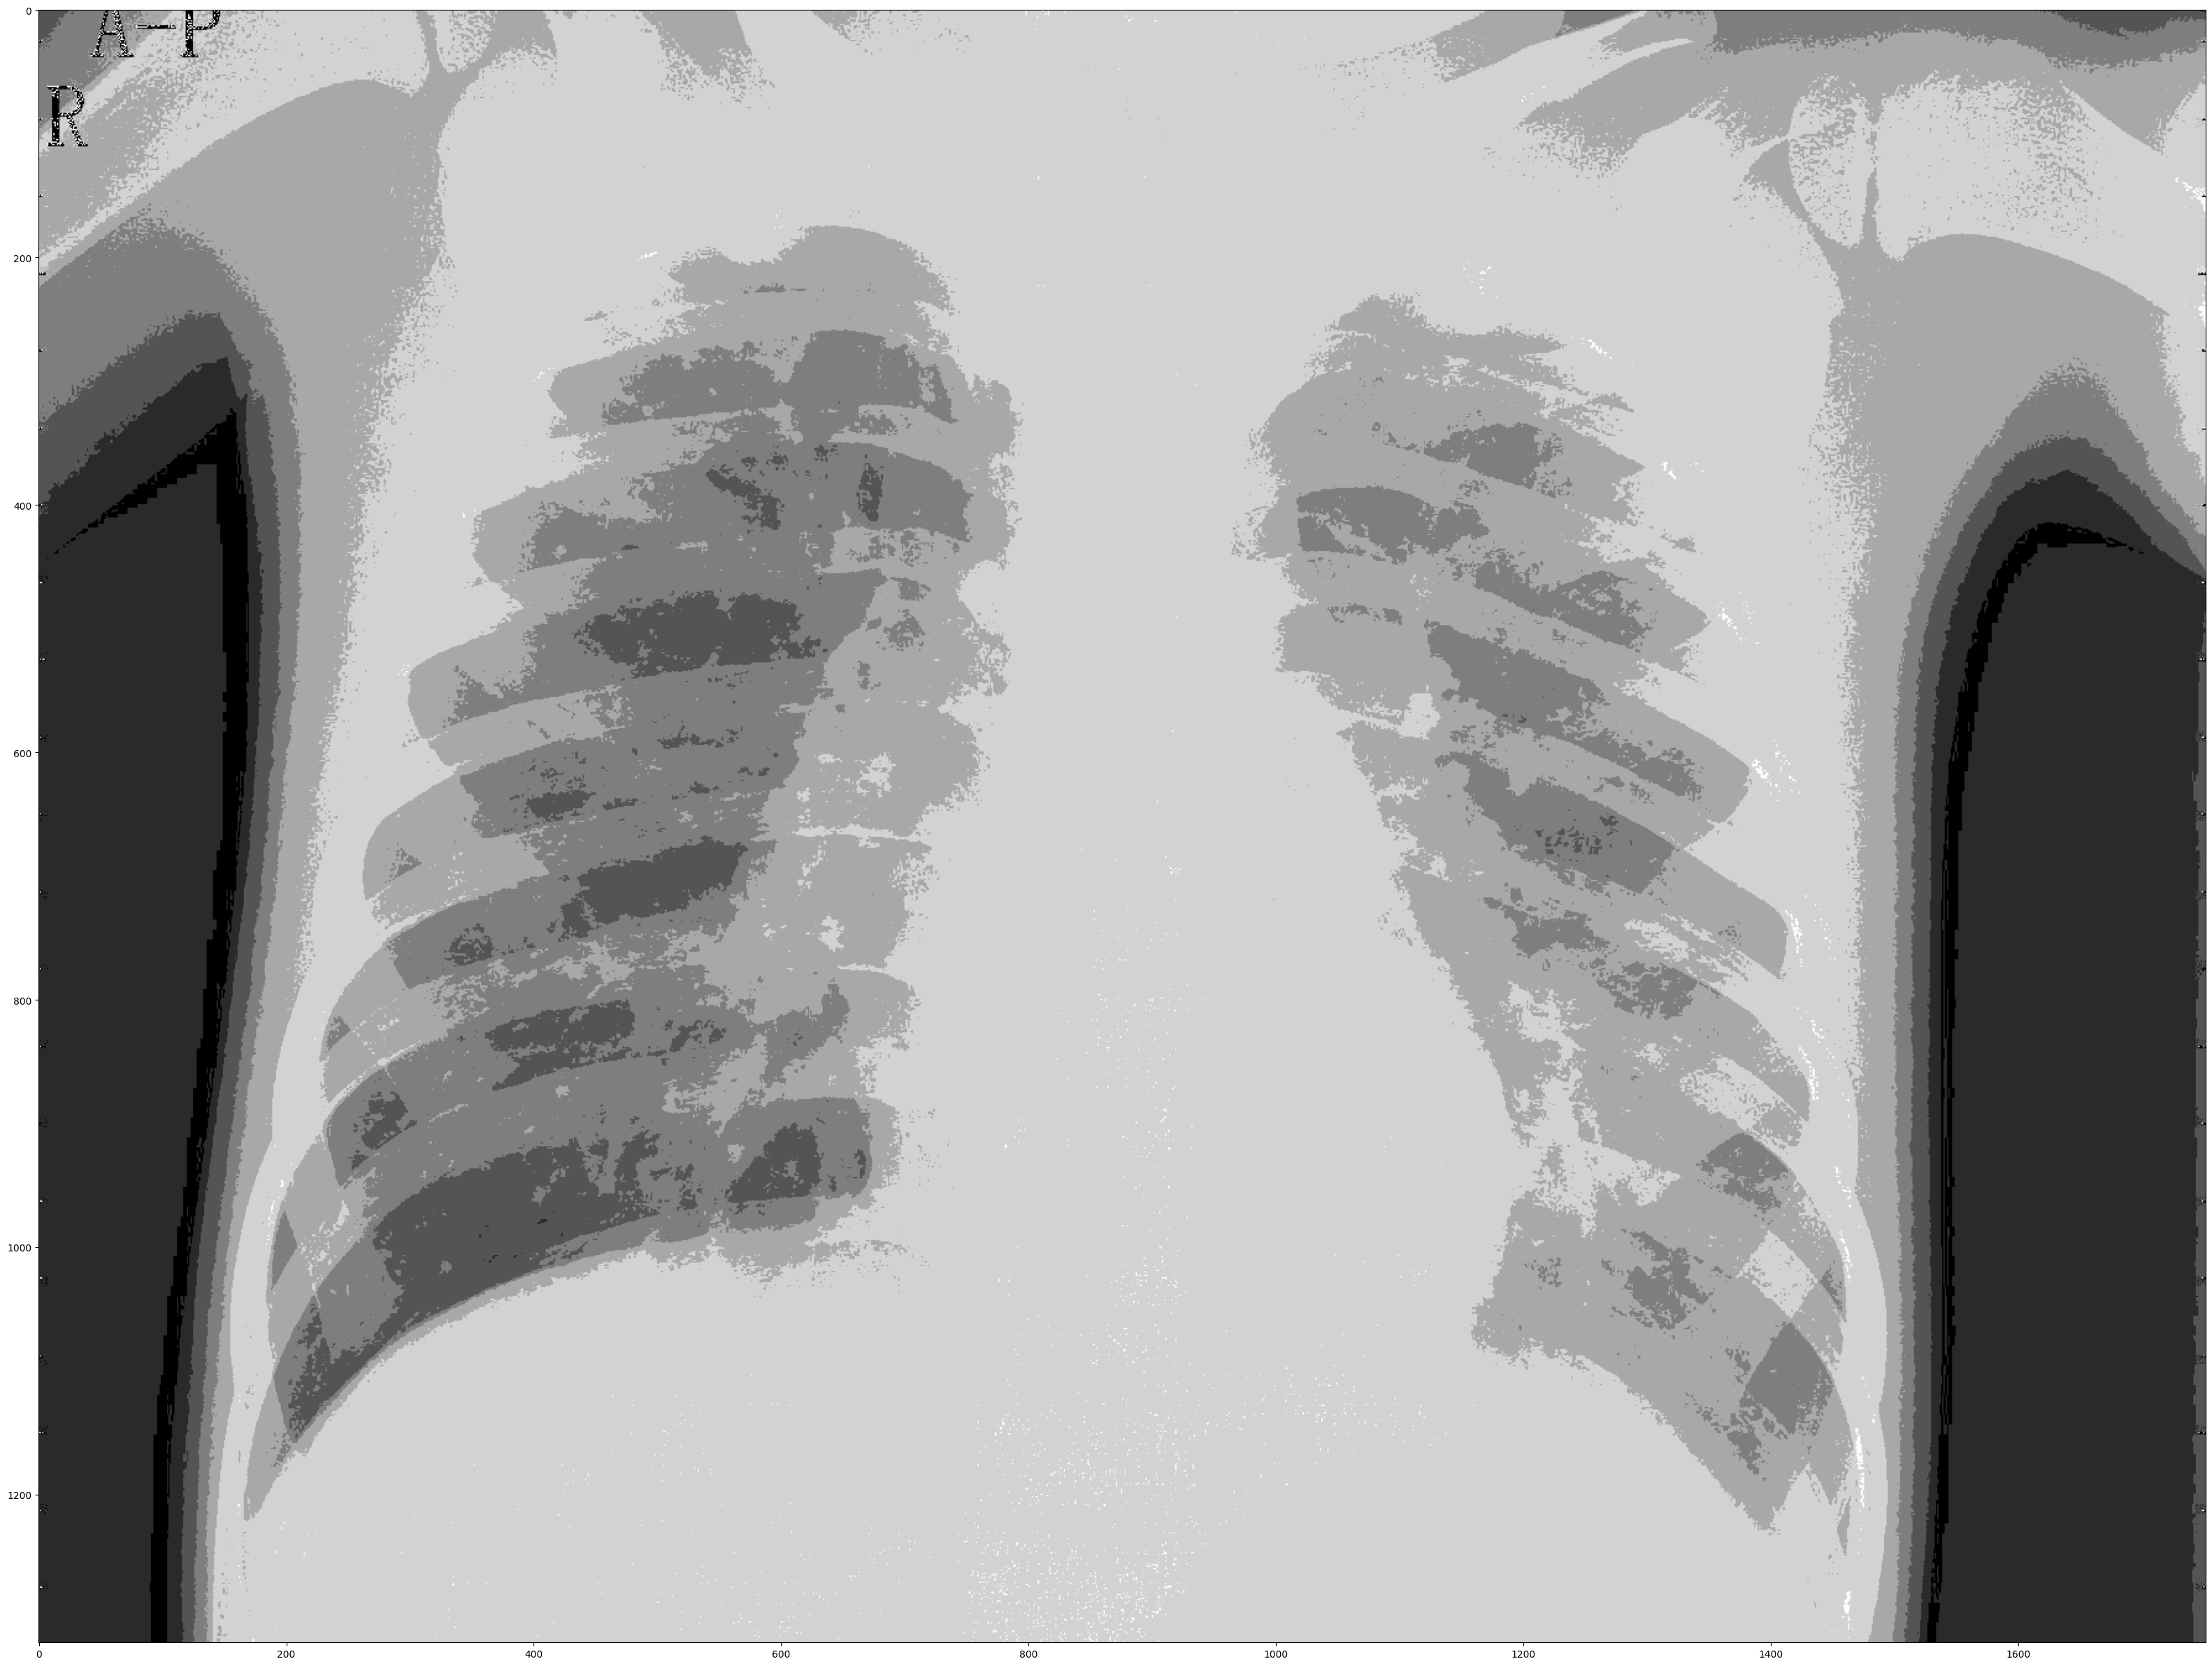

In [79]:
imgReducida = reducirColores(image, 6)
plt.figure(figsize=(40,40))
plt.imshow(imgReducida, cmap=plt.cm.gray)

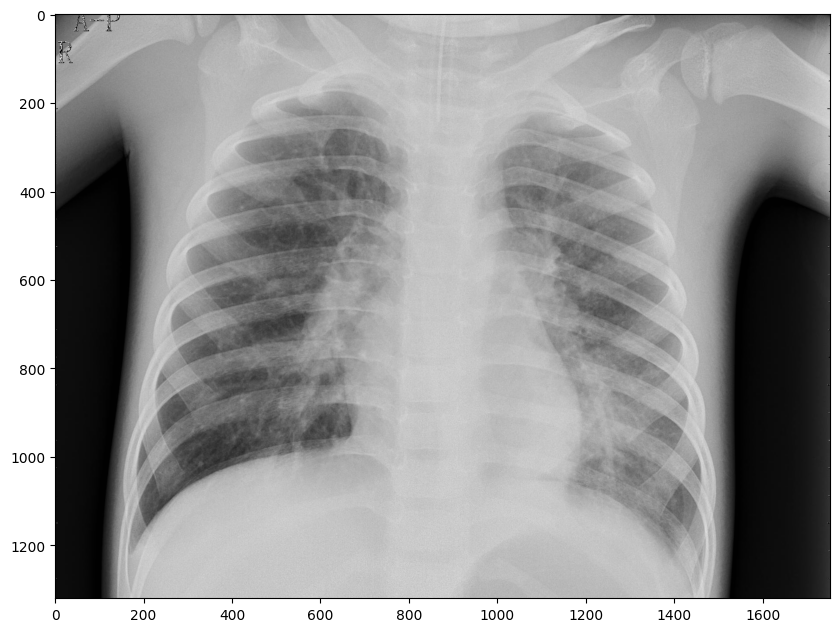

In [80]:
imageNegativa = obtenerNegativo(image)
plt.figure(figsize=(10,10))
plt.imshow(imageNegativa, cmap=plt.cm.gray)